In [19]:
%matplotlib notebook

# internal
import urllib.request
import json

# external
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
system_info_url = 'http://gbfs.urbansharing.com/bergen-city-bike/system_information.json'
station_info_url = 'http://gbfs.urbansharing.com/bergen-city-bike/station_information.json'
station_status_url = 'http://gbfs.urbansharing.com/bergen-city-bike/station_status.json'

In [3]:
system_info = json.loads(urllib.request.urlopen(system_info_url).read())

In [4]:
print(json.dumps(system_info, indent=4, ensure_ascii=False))

{
    "last_updated": 1531306779,
    "ttl": 10,
    "data": {
        "id": "bergen-city-bike",
        "language": "nb",
        "name": "Bergen City Bike",
        "operator": "Urban Infrastructure Partner",
        "timezone": "Europe/Oslo",
        "phone_number": "91589700",
        "email": "post@bergenbysykkel.no"
    }
}


In [5]:
station_info = json.loads(urllib.request.urlopen(station_info_url).read())

In [6]:
print(json.dumps(station_info, indent=4, ensure_ascii=False))

{
    "last_updated": 1531306779,
    "ttl": 10,
    "data": {
        "stations": [
            {
                "station_id": 3,
                "name": "Grieghallen",
                "capacity": 31,
                "address": "Edvard Griegsplass",
                "lon": 5.32833480821864,
                "lat": 60.3881668536764
            },
            {
                "station_id": 5,
                "name": "Solheimsviken",
                "capacity": 17,
                "address": "Solheims gaten",
                "lon": 5.33572172855838,
                "lat": 60.377119520251
            },
            {
                "station_id": 7,
                "name": "Neumannsgate",
                "capacity": 31,
                "address": "Neumannsgate",
                "lon": 5.31889235970084,
                "lat": 60.3914548486561
            },
            {
                "station_id": 8,
                "name": "Haukeland sykehus",
                "capacity": 20,
          

In [7]:
capacity = sum(x['capacity'] for x in station_info['data']['stations'])
print(f"Capacity (total): {capacity} bikes")

Capacity (total): 707 bikes


In [8]:
bergensere = 254_235 # https://www.ssb.no/befolkning/statistikker/beftett
print(f"Bikes per citizen in Bergen: {capacity/bergensere:.4f}")

Bikes per citizen in Bergen: 0.0028


In [9]:
station_status = json.loads(urllib.request.urlopen(station_status_url).read())

In [10]:
print(json.dumps(station_status, indent=4, ensure_ascii=False))

{
    "last_updated": 1531306779,
    "ttl": 10,
    "data": {
        "stations": [
            {
                "station_id": 83,
                "num_bikes_available": 4,
                "num_docks_available": 13,
                "is_installed": 1,
                "is_renting": 1,
                "is_returning": 1,
                "last_reported": 1531306779
            },
            {
                "station_id": 8,
                "num_bikes_available": 1,
                "num_docks_available": 18,
                "is_installed": 1,
                "is_renting": 1,
                "is_returning": 1,
                "last_reported": 1531306779
            },
            {
                "station_id": 7,
                "num_bikes_available": 2,
                "num_docks_available": 29,
                "is_installed": 1,
                "is_renting": 1,
                "is_returning": 1,
                "last_reported": 1531306779
            },
            {
                "s

In [11]:
station_ids = [x['station_id'] for x in station_info['data']['stations']]
station_names = [x['name'] for x in station_info['data']['stations']]

stations = {key: val for (key, val) in zip(station_ids, station_names)}

pd.DataFrame.from_dict(stations, orient='index', columns=['Name'])

,Name
3,Grieghallen
5,Solheimsviken
7,Neumannsgate
8,Haukeland sykehus
24,Studentboligene ved Grønneviken
33,Høyskolen på Vestlandet
34,Cornerteateret
49,Studentsenteret UIB
58,Tårnplass
75,Akvariet


In [12]:
station_names = [stations[x['station_id']] for x in station_status['data']['stations']]
available_bikes = [x['num_bikes_available'] for x in station_status['data']['stations']]
available_docks = [x['num_docks_available'] for x in station_status['data']['stations']]

availability_by_station = {key: list(value) for (key, value) in zip(station_names, zip(available_bikes, available_docks))}

pd.DataFrame.from_dict(availability_by_station, orient='index', columns=['Bikes', 'Total'])

,Bikes,Total
Bergen jernbanestasjon,4,13
Haukeland sykehus,1,18
Neumannsgate,2,29
Tårnplass,9,16
Jonsvollkvartalet,0,19
Johanneskirken,0,25
Media City,13,6
Studentsenteret UIB,1,30
ADO arena,0,19
Småstrandgaten,4,22


<IPython.core.display.Javascript object>


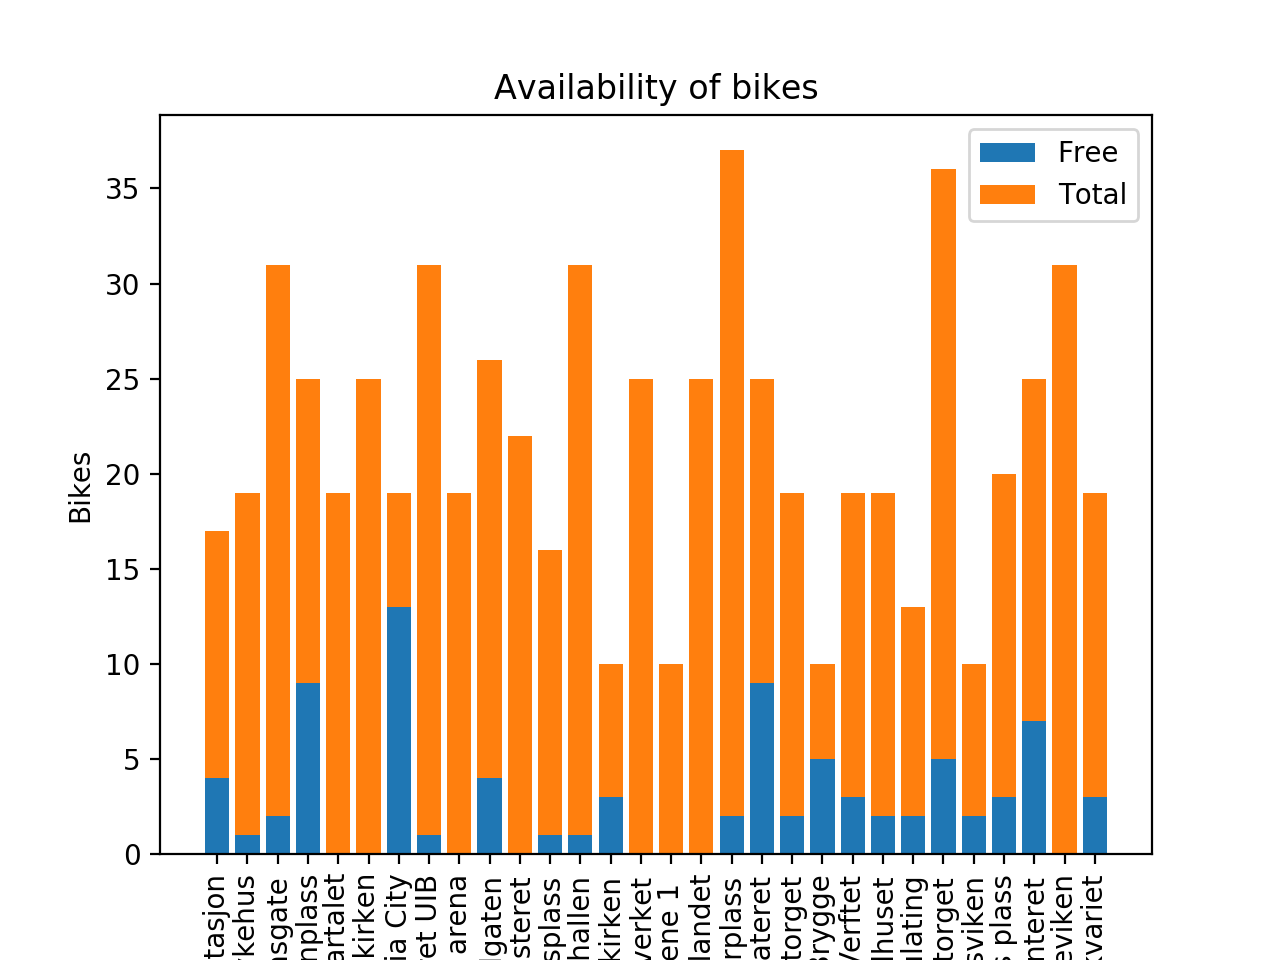

In [20]:
c = []
v = []
for key, val in availability_by_station.items():
    c.append(key)
    v.append(val)
v = np.array(v)
p1 = plt.bar(range(len(c)), v[:,0])
p2 = plt.bar(range(len(c)), v[:,1], bottom=v[:,0])
plt.ylabel('Bikes')
plt.title("Availability of bikes")
plt.legend((p1[0], p2[0]), ('Free', 'Total'))
plt.xticks(range(len(c)), c, rotation=90)
plt.show()